<a href="https://colab.research.google.com/github/AmineMiaoui/MPindex/blob/main/MP_indexation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image, display


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from matplotlib.image import imread
#data = os.listdir('/content/drive/MyDrive/TP_index/')
data = [os.path.abspath(os.path.join("/content/drive/MyDrive/MP_indexation/", x)) for x in os.listdir("/content/drive/MyDrive/MP_indexation/") if '.png' in x or '.jpg' in x]

images_df = pd.DataFrame([[io.imread(data)] for data in data], columns=['images'])
images_df['id'] = data
images_df['id'] = images_df['id'].apply(os.path.basename)
images_df


,images,id
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1.jpg
1,"[[[61, 78, 94], [61, 78, 94], [60, 77, 93], [5...",2.jpg
2,"[[[18, 18, 26], [21, 21, 29], [22, 22, 32], [1...",3.jpg
3,"[[[252, 235, 227], [252, 235, 227], [252, 235,...",4.jpg
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",6.jpg
5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",7.jpg
6,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",8.jpg
7,"[[[233, 236, 243], [233, 236, 243], [233, 236,...",9.jpg
8,"[[[28, 28, 40], [28, 28, 40], [29, 29, 41], [2...",0.jpg
9,"[[[112, 63, 48], [111, 62, 47], [108, 59, 44],...",5.jpg


In [ ]:
max = np.amax(images_df.images[0])
min = np.amin(images_df.images[0])
print(min,max)

0 255


In [ ]:
corr = []
sig = []
grey=[]

for i in range(len(images_df['id'])):
        corr.append([[min for _ in range(max+1)] for _ in range(max+1)])
        sig.append([min for _ in range(max+1)])
        grey.append(cv.cvtColor(images_df.images[i], cv.COLOR_BGR2GRAY))


images_df["grey"] = grey
images_df['corrolelograme'] = corr
images_df['signature'] = sig
images_df

,images,id,grey,corrolelograme,signature
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[[61, 78, 94], [61, 78, 94], [60, 77, 93], [5...",2.jpg,"[[81, 81, 80, 79, 78, 77, 76, 76, 74, 74, 75, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[[18, 18, 26], [21, 21, 29], [22, 22, 32], [1...",3.jpg,"[[20, 23, 25, 18, 9, 6, 13, 19, 23, 24, 26, 26...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[[[252, 235, 227], [252, 235, 227], [252, 235,...",4.jpg,"[[235, 235, 235, 235, 235, 236, 236, 236, 235,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",6.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",7.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",8.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[[[233, 236, 243], [233, 236, 243], [233, 236,...",9.jpg,"[[238, 238, 238, 239, 239, 240, 240, 240, 239,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[[[28, 28, 40], [28, 28, 40], [29, 29, 41], [2...",0.jpg,"[[32, 32, 33, 33, 34, 34, 34, 35, 35, 34, 34, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"[[[112, 63, 48], [111, 62, 47], [108, 59, 44],...",5.jpg,"[[64, 63, 60, 59, 59, 62, 64, 66, 61, 63, 66, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


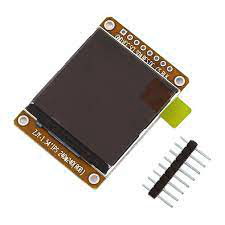

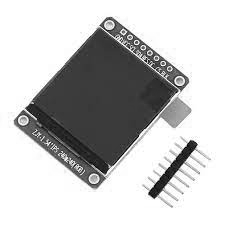

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images_df.images[0])
cv2_imshow(images_df.grey[0])




In [ ]:
import math
grey = images_df.grey[0]
print(math.sqrt(grey.size))
grey[224][224]

225.0


255

In [ ]:
img = images_df.images[0]
print(math.sqrt(img.size/3))
img[224][224]

225.0


array([255, 255, 255], dtype=uint8)

In [ ]:
for i in range(len(images_df['id'])):
  print(math.sqrt(images_df.grey[i].size))

225.0
225.0
225.0
225.0
225.0
225.0
225.0
225.0
225.0
225.0
225.0
225.0
225.0
225.0


In [ ]:
#Tous les images sont caree de dimension 225 x225
#Il suffit d'ajouter des images au drive de meme dimension et re-executer 
#les codes precedants pour les ajouter a la base

In [ ]:
def corr(I) :
  cor = [[0 for _ in range(256)] for _ in range(256)]
  for x in range(1, 224, 1) : 
   for y in range(1, 224, 1) : 
      v = I[x][y]
      v1=I[x-1][y-1]
      cor[v][v1]=cor[v][v1]+1
      v2=I[x-1][y]
      cor[v][v2]=cor[v][v2]+1
      v3=I[x-1][y+1]
      cor[v][v3]=cor[v][v3]+1
      v4=I[x][y-1]
      cor[v][v4]=cor[v][v4]+1
      v6=I[x][y+1]
      cor[v][v6]=cor[v][v6]+1
      v7=I[x+1][y-1]
      cor[v][v7]=cor[v][v7]+1
      v8=I[x+1][y]
      cor[v][v8]=cor[v][v8]+1
      v9=I[x+1][y+1]
      cor[v][v9]=cor[v][v9]+1
  return cor

In [ ]:
cor = corr(images_df.grey[0])
print(cor[255][255])

206020


In [ ]:
def calcule_signature(cor) :
   sig =[0 for _ in range(256)]
   for i in range(256) :
     sig[i] = cor[i][i]

   return sig 

In [ ]:
sig= calcule_signature(corr(images_df.grey[0]))
print(corr(images_df.grey[0]))


[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 3, 2, 0, 5, 2, 0, 2, 0, 3, 0, 0, 2, 1, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1, 4, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 3, 0, 0, 0, 2, 2, 0, 

In [ ]:
for i in range(len(images_df['id'])):
  cor = corr(images_df.grey[i])
  images_df.corrolelograme[i] =cor
images_df

,images,id,grey,corrolelograme,signature
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[[61, 78, 94], [61, 78, 94], [60, 77, 93], [5...",2.jpg,"[[81, 81, 80, 79, 78, 77, 76, 76, 74, 74, 75, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[[18, 18, 26], [21, 21, 29], [22, 22, 32], [1...",3.jpg,"[[20, 23, 25, 18, 9, 6, 13, 19, 23, 24, 26, 26...","[[28, 35, 31, 10, 15, 11, 6, 13, 4, 1, 12, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[[[252, 235, 227], [252, 235, 227], [252, 235,...",4.jpg,"[[235, 235, 235, 235, 235, 236, 236, 236, 235,...","[[2414, 497, 374, 266, 306, 206, 266, 144, 156...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",6.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[268842, 2185, 1299, 903, 806, 625, 549, 469,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",7.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",8.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[[[233, 236, 243], [233, 236, 243], [233, 236,...",9.jpg,"[[238, 238, 238, 239, 239, 240, 240, 240, 239,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[[[28, 28, 40], [28, 28, 40], [29, 29, 41], [2...",0.jpg,"[[32, 32, 33, 33, 34, 34, 34, 35, 35, 34, 34, ...","[[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"[[[112, 63, 48], [111, 62, 47], [108, 59, 44],...",5.jpg,"[[64, 63, 60, 59, 59, 62, 64, 66, 61, 63, 66, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
for i in range(len(images_df['id'])):
  images_df.signature[i] = calcule_signature(corr(images_df.grey[i]))
images_df

,images,id,grey,corrolelograme,signature
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,...","[0, 8, 4, 6, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[[61, 78, 94], [61, 78, 94], [60, 77, 93], [5...",2.jpg,"[[81, 81, 80, 79, 78, 77, 76, 76, 74, 74, 75, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[[18, 18, 26], [21, 21, 29], [22, 22, 32], [1...",3.jpg,"[[20, 23, 25, 18, 9, 6, 13, 19, 23, 24, 26, 26...","[[28, 35, 31, 10, 15, 11, 6, 13, 4, 1, 12, 0, ...","[28, 366, 301, 268, 251, 167, 194, 154, 180, 1..."
3,"[[[252, 235, 227], [252, 235, 227], [252, 235,...",4.jpg,"[[235, 235, 235, 235, 235, 236, 236, 236, 235,...","[[2414, 497, 374, 266, 306, 206, 266, 144, 156...","[2414, 1072, 588, 270, 154, 86, 72, 60, 32, 16..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",6.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[268842, 2185, 1299, 903, 806, 625, 549, 469,...","[268842, 4644, 2036, 222, 146, 114, 50, 48, 28..."
5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",7.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, ..."
6,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",8.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[[[233, 236, 243], [233, 236, 243], [233, 236,...",9.jpg,"[[238, 238, 238, 239, 239, 240, 240, 240, 239,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, ..."
8,"[[[28, 28, 40], [28, 28, 40], [29, 29, 41], [2...",0.jpg,"[[32, 32, 33, 33, 34, 34, 34, 35, 35, 34, 34, ...","[[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,...","[0, 4, 0, 0, 2, 0, 0, 14, 2, 4, 6, 6, 8, 20, 4..."
9,"[[[112, 63, 48], [111, 62, 47], [108, 59, 44],...",5.jpg,"[[64, 63, 60, 59, 59, 62, 64, 66, 61, 63, 66, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 4, 2, 4, 8, 10, 12, 16, 14, 48, 174,..."


In [ ]:
dist = []

for i in range(len(images_df['id'])):
  dist.append(0)
images_df['distance'] = dist
images_df 


,images,id,grey,corrolelograme,signature,distance
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,...","[0, 8, 4, 6, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[[[61, 78, 94], [61, 78, 94], [60, 77, 93], [5...",2.jpg,"[[81, 81, 80, 79, 78, 77, 76, 76, 74, 74, 75, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[[[18, 18, 26], [21, 21, 29], [22, 22, 32], [1...",3.jpg,"[[20, 23, 25, 18, 9, 6, 13, 19, 23, 24, 26, 26...","[[28, 35, 31, 10, 15, 11, 6, 13, 4, 1, 12, 0, ...","[28, 366, 301, 268, 251, 167, 194, 154, 180, 1...",0
3,"[[[252, 235, 227], [252, 235, 227], [252, 235,...",4.jpg,"[[235, 235, 235, 235, 235, 236, 236, 236, 235,...","[[2414, 497, 374, 266, 306, 206, 266, 144, 156...","[2414, 1072, 588, 270, 154, 86, 72, 60, 32, 16...",0
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",6.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[268842, 2185, 1299, 903, 806, 625, 549, 469,...","[268842, 4644, 2036, 222, 146, 114, 50, 48, 28...",0
5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",7.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, ...",0
6,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",8.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
7,"[[[233, 236, 243], [233, 236, 243], [233, 236,...",9.jpg,"[[238, 238, 238, 239, 239, 240, 240, 240, 239,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, ...",0
8,"[[[28, 28, 40], [28, 28, 40], [29, 29, 41], [2...",0.jpg,"[[32, 32, 33, 33, 34, 34, 34, 35, 35, 34, 34, ...","[[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,...","[0, 4, 0, 0, 2, 0, 0, 14, 2, 4, 6, 6, 8, 20, 4...",0
9,"[[[112, 63, 48], [111, 62, 47], [108, 59, 44],...",5.jpg,"[[64, 63, 60, 59, 59, 62, 64, 66, 61, 63, 66, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 4, 2, 4, 8, 10, 12, 16, 14, 48, 174,...",0


In [ ]:
def calcule_distance(sig_choice,sig):
  distance = 0
  for i in range(256):
    distance = distance + abs(sig_choice[i] - sig[i])
  return distance/256

In [ ]:
#Choix de l'image pour comparer la base d'image avec elle dans ce cas id de l'mage = 0 -> 1.jpg
choice = 0
for i in range(len(images_df['id'])):
    images_df.distance[i] = calcule_distance(images_df.signature[choice],images_df.signature[i])
   


<ipython-input-197-fb9bf4ac3ca6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images_df.distance[i] = calcule_distance(images_df.signature[choice],images_df.signature[i])


In [ ]:
images_df.sort_values(by=['distance'])

,images,id,grey,corrolelograme,signature,distance
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,...","[0, 8, 4, 6, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
6,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",8.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",655
5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",7.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, ...",927
13,"[[[145, 133, 109], [150, 138, 114], [145, 133,...",11.jpg,"[[127, 132, 127, 118, 129, 153, 165, 161, 159,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1090
2,"[[[18, 18, 26], [21, 21, 29], [22, 22, 32], [1...",3.jpg,"[[20, 23, 25, 18, 9, 6, 13, 19, 23, 24, 26, 26...","[[28, 35, 31, 10, 15, 11, 6, 13, 4, 1, 12, 0, ...","[28, 366, 301, 268, 251, 167, 194, 154, 180, 1...",1117
8,"[[[28, 28, 40], [28, 28, 40], [29, 29, 41], [2...",0.jpg,"[[32, 32, 33, 33, 34, 34, 34, 35, 35, 34, 34, ...","[[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,...","[0, 4, 0, 0, 2, 0, 0, 14, 2, 4, 6, 6, 8, 20, 4...",1139
10,"[[[106, 123, 143], [107, 124, 144], [110, 127,...",13.jpg,"[[127, 128, 131, 135, 138, 141, 144, 145, 152,...","[[0, 2, 1, 0, 0, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0,...","[0, 38, 8, 16, 6, 6, 8, 36, 18, 26, 62, 65, 56...",1175
7,"[[[233, 236, 243], [233, 236, 243], [233, 236,...",9.jpg,"[[238, 238, 238, 239, 239, 240, 240, 240, 239,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, ...",1207
9,"[[[112, 63, 48], [111, 62, 47], [108, 59, 44],...",5.jpg,"[[64, 63, 60, 59, 59, 62, 64, 66, 61, 63, 66, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 4, 2, 4, 8, 10, 12, 16, 14, 48, 174,...",1236
3,"[[[252, 235, 227], [252, 235, 227], [252, 235,...",4.jpg,"[[235, 235, 235, 235, 235, 236, 236, 236, 235,...","[[2414, 497, 374, 266, 306, 206, 266, 144, 156...","[2414, 1072, 588, 270, 154, 86, 72, 60, 32, 16...",1268


In [ ]:
#la fonction return_func() faire le tri des image selon la distance par order croissant 
#plus la distance est petit plus les images son't proches
def return_func():
  return images_df[['id', 'distance']].sort_values(by=['distance'])

In [ ]:
return_func()

,id,distance
0,1.jpg,0
6,8.jpg,655
5,7.jpg,927
13,11.jpg,1090
2,3.jpg,1117
8,0.jpg,1139
10,13.jpg,1175
7,9.jpg,1207
9,5.jpg,1236
3,4.jpg,1268


In [ ]:
#x=images_df[['id', 'distance']].sort_values(by=['distance'])
#x.id[0]
#for i in range(len(images_df['id'])):
 #x.id[i] = x.id[i].replace(".jpg","")
#x 

<ipython-input-208-1f3de8fb38de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.id[i] = x.id[i].replace(".jpg","")


,id,distance
0,1,0
6,8,655
5,7,927
13,11,1090
2,3,1117
8,0,1139
10,13,1175
7,9,1207
9,5,1236
3,4,1268


In [ ]:
y=images_df[['id', 'distance']].sort_values(by=['distance'])

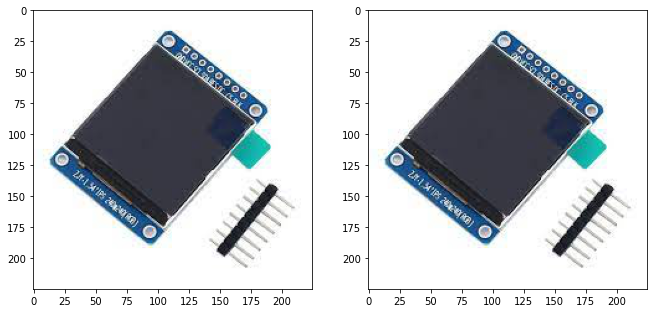

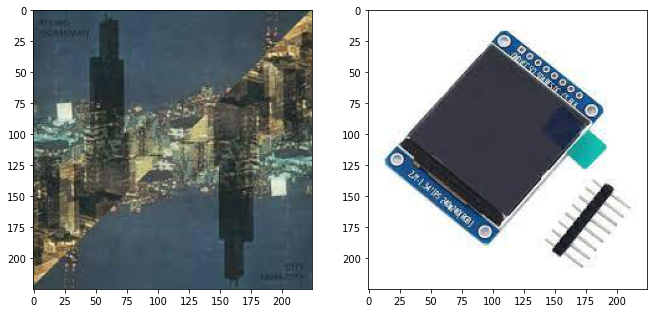

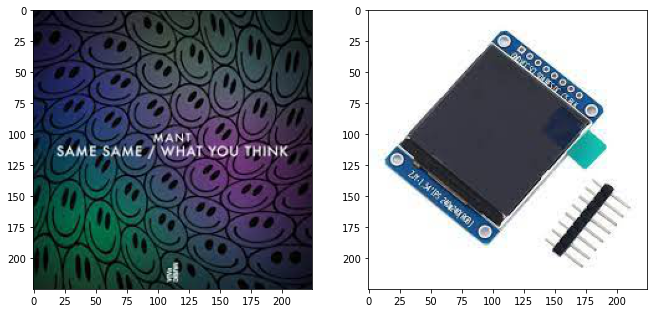

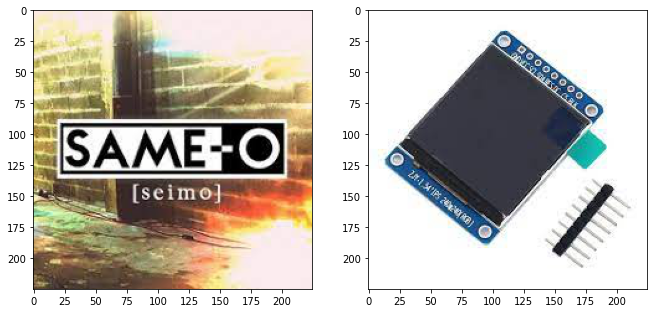

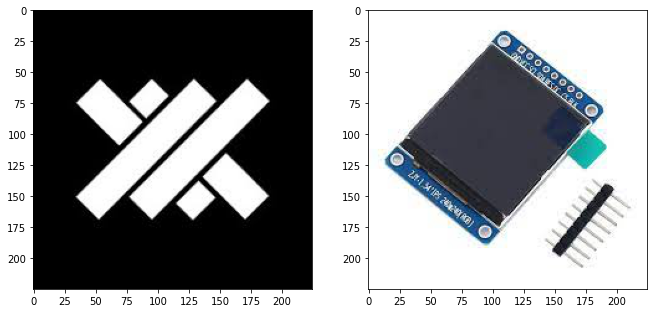

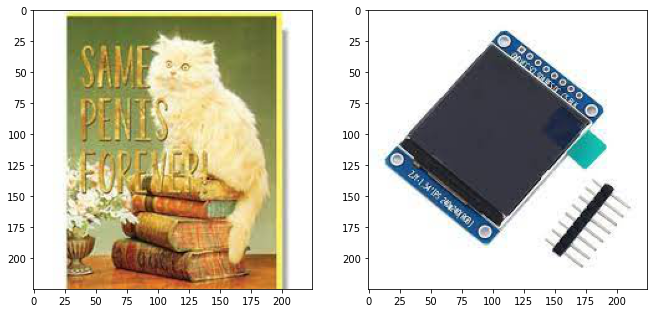

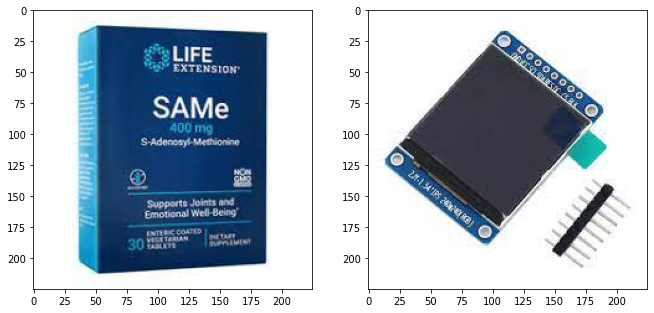

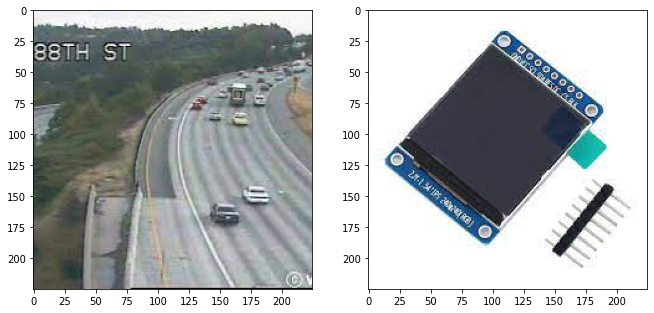

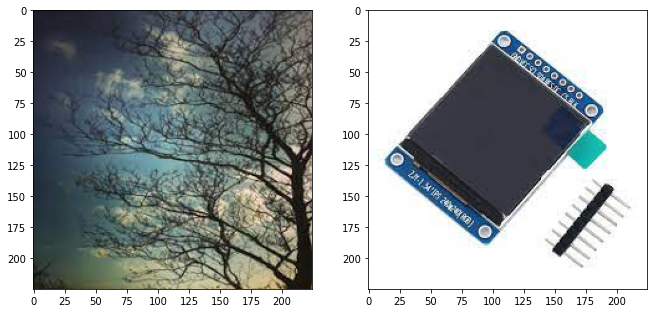

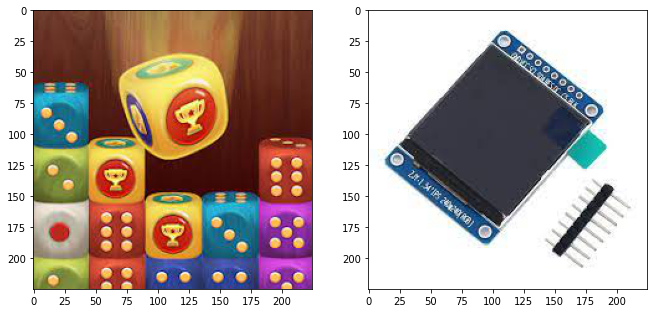

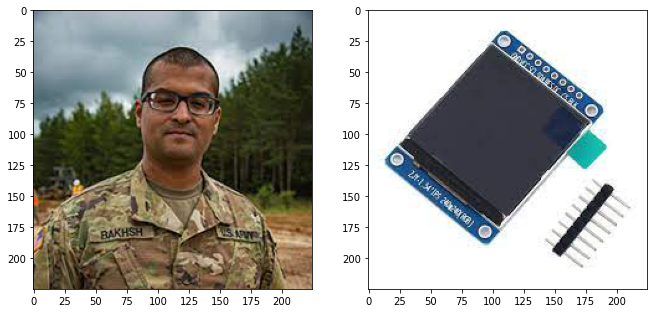

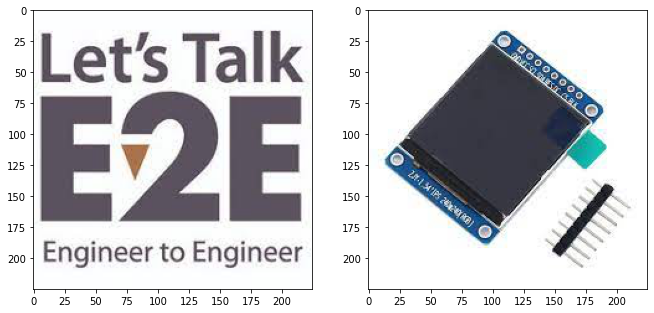

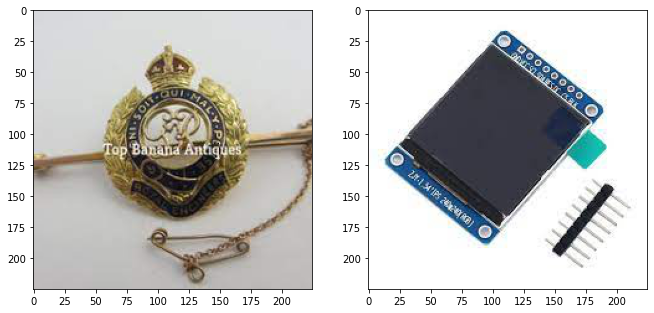

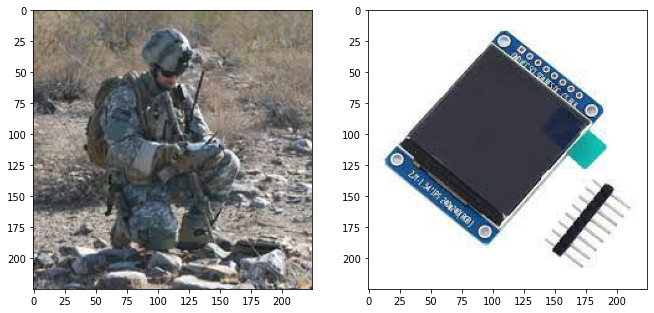

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline


rcParams['figure.figsize'] = 11 ,8


for i in range(len(images_df['id'])):
 img_A = mpimg.imread('/content/drive/MyDrive/MP_indexation/'+y.id[i])
 img_B = mpimg.imread('/content/drive/MyDrive/MP_indexation/'+y.id[choice])
 fig, ax = plt.subplots(1,2)
 ax[0].imshow(img_A)
 ax[1].imshow(img_B)